**1.	Can you think of a few applications for a sequence-to-sequence RNN? What about a sequence-to-vector RNN, and a vector-to-sequence RNN?**

**Ans:**
    
- In Sequence to Sequence Learning, RNN is trained to map an input sequence to an output sequence which is not necessarily of the same length. Applications are speech recognition, machine translation, image captioning and question answering.

- The RNN model takes a single vector as input and produces a sequence as output. An example of these models can be image to sentence model, which takes an image(consider it as a vector) and then produces a sentence to describe that image

**2.	How many dimensions must the inputs of an RNN layer have? What does each dimension represent? What about its outputs?**

**Ans:**
    
- The RNN input needs to have 3 dimensions. Typically it would be batch size, the number of steps and number of features

- In a typical RNN a single output is obtained. 

- But in backpropagation, you use the current as well as the previous inputs as input. This is called a timestep and one timestep will consist of many time series data points entering the RNN simultaneously.

**3.	If you want to build a deep sequence-to-sequence RNN, which RNN layers should have return_sequences=True? What about a sequence-to-vector RNN?**

**Ans:**
    


**4.	Suppose you have a daily univariate time series, and you want to forecast the next seven days. Which RNN architecture should you use?**

**Ans:**
    
A stack of RNNs with return_sequences=True at every layer except the top. You can then have seven neurons in the output.

**5.	What are the main difficulties when training RNNs? How can you handle them?**

**Ans:**
    
RNNs suffer from the problem of vanishing gradients. The gradients carry information used in the RNN, and when the gradient becomes too small, the parameter updates become insignificant. This makes the learning of long data sequences difficult.

**6.	Can you sketch the LSTM cell’s architecture?**

**Ans:**
    
Architecture of LSTMs

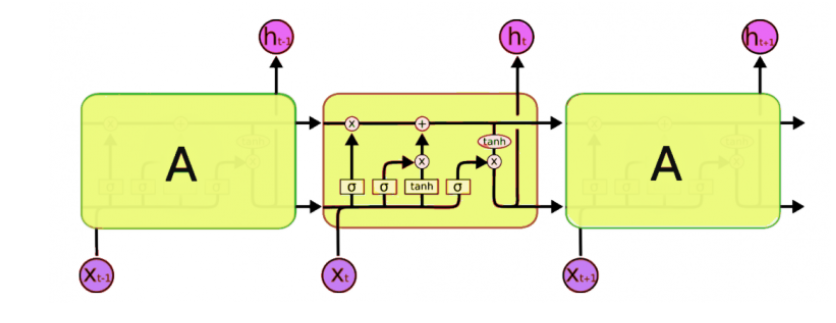

1 Forget Gate

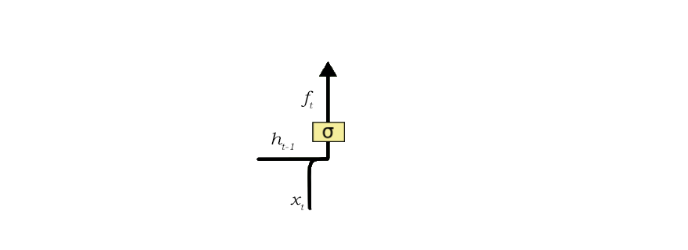

2 Input Gate

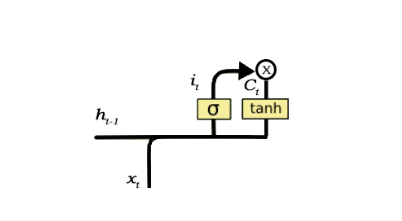

3 Output Gate

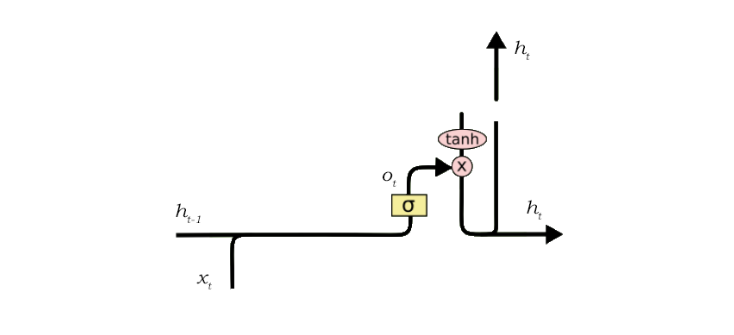



**7.	Why would you want to use 1D convolutional layers in an RNN?**

**Ans:**
    
Such 1D convolution layers can recognize local patterns in a sequence. Because the same input transformation is performed on every patch, a pattern learned at a certain position in a sentence can later be recognized at a different position, making 1D CNNs translation invariant (for temporal translations).

**8.	Which neural network architecture could you use to classify videos?**

**Ans:**
    
LSTM Network will be used to classify the videos.

**9.	Train a classification model for the SketchRNN dataset, available in TensorFlow Datasets.**

In [1]:
import numpy as np 
import pandas as pd 
from tensorflow import keras
import tensorflow as tf

In [2]:
# Download the data
download_root = "http://download.tensorflow.org/data/"
filename = "quickdraw_tutorial_dataset_v1.tar.gz"
filepath = keras.utils.get_file(filename,
                               download_root + filename,
                               cache_subdir="datasets/quickdraw",
                               extract=True)

1065301781/1065301781 [==============================] - 343s 0us/step


In [3]:
# split the data into train files and test files
from pathlib import Path

quickdraw_dir = Path(filepath).parent
train_files = sorted([str(path) for path in quickdraw_dir.glob("training.tfrecord-*")])
eval_files = sorted([str(path) for path in quickdraw_dir.glob("eval.tfrecord-*")])

In [4]:
train_files

['C:\\Users\\Sai\\.keras\\datasets\\quickdraw\\training.tfrecord-00000-of-00010',
 'C:\\Users\\Sai\\.keras\\datasets\\quickdraw\\training.tfrecord-00001-of-00010',
 'C:\\Users\\Sai\\.keras\\datasets\\quickdraw\\training.tfrecord-00002-of-00010',
 'C:\\Users\\Sai\\.keras\\datasets\\quickdraw\\training.tfrecord-00003-of-00010',
 'C:\\Users\\Sai\\.keras\\datasets\\quickdraw\\training.tfrecord-00004-of-00010',
 'C:\\Users\\Sai\\.keras\\datasets\\quickdraw\\training.tfrecord-00005-of-00010',
 'C:\\Users\\Sai\\.keras\\datasets\\quickdraw\\training.tfrecord-00006-of-00010',
 'C:\\Users\\Sai\\.keras\\datasets\\quickdraw\\training.tfrecord-00007-of-00010',
 'C:\\Users\\Sai\\.keras\\datasets\\quickdraw\\training.tfrecord-00008-of-00010',
 'C:\\Users\\Sai\\.keras\\datasets\\quickdraw\\training.tfrecord-00009-of-00010']

In [5]:
eval_files

['C:\\Users\\Sai\\.keras\\datasets\\quickdraw\\eval.tfrecord-00000-of-00010',
 'C:\\Users\\Sai\\.keras\\datasets\\quickdraw\\eval.tfrecord-00001-of-00010',
 'C:\\Users\\Sai\\.keras\\datasets\\quickdraw\\eval.tfrecord-00002-of-00010',
 'C:\\Users\\Sai\\.keras\\datasets\\quickdraw\\eval.tfrecord-00003-of-00010',
 'C:\\Users\\Sai\\.keras\\datasets\\quickdraw\\eval.tfrecord-00004-of-00010',
 'C:\\Users\\Sai\\.keras\\datasets\\quickdraw\\eval.tfrecord-00005-of-00010',
 'C:\\Users\\Sai\\.keras\\datasets\\quickdraw\\eval.tfrecord-00006-of-00010',
 'C:\\Users\\Sai\\.keras\\datasets\\quickdraw\\eval.tfrecord-00007-of-00010',
 'C:\\Users\\Sai\\.keras\\datasets\\quickdraw\\eval.tfrecord-00008-of-00010',
 'C:\\Users\\Sai\\.keras\\datasets\\quickdraw\\eval.tfrecord-00009-of-00010']

In [6]:
# Open the classes from train and test dataset

with open(quickdraw_dir / "training.tfrecord.classes") as train_classes_file:
    train_classes = train_classes_file.readlines()

with open(quickdraw_dir / "eval.tfrecord.classes") as test_classes_file:
    test_classes = test_classes_file.readlines()

In [7]:
# get all the class name 
assert train_classes == test_classes
class_names = [name.strip().lower() for name in train_classes]

In [8]:
sorted(class_names)

['aircraft carrier',
 'airplane',
 'alarm clock',
 'ambulance',
 'angel',
 'animal migration',
 'ant',
 'anvil',
 'apple',
 'arm',
 'asparagus',
 'axe',
 'backpack',
 'banana',
 'bandage',
 'barn',
 'baseball',
 'baseball bat',
 'basket',
 'basketball',
 'bat',
 'bathtub',
 'beach',
 'bear',
 'beard',
 'bed',
 'bee',
 'belt',
 'bench',
 'bicycle',
 'binoculars',
 'bird',
 'birthday cake',
 'blackberry',
 'blueberry',
 'book',
 'boomerang',
 'bottlecap',
 'bowtie',
 'bracelet',
 'brain',
 'bread',
 'bridge',
 'broccoli',
 'broom',
 'bucket',
 'bulldozer',
 'bus',
 'bush',
 'butterfly',
 'cactus',
 'cake',
 'calculator',
 'calendar',
 'camel',
 'camera',
 'camouflage',
 'campfire',
 'candle',
 'cannon',
 'canoe',
 'car',
 'carrot',
 'castle',
 'cat',
 'ceiling fan',
 'cell phone',
 'cello',
 'chair',
 'chandelier',
 'church',
 'circle',
 'clarinet',
 'clock',
 'cloud',
 'coffee cup',
 'compass',
 'computer',
 'cookie',
 'cooler',
 'couch',
 'cow',
 'crab',
 'crayon',
 'crocodile',
 'crow

In [9]:
# Create a function to parse the data in batches
def parse(data_batch):
    feature_descriptions = {
        "ink": tf.io.VarLenFeature(dtype=tf.float32),
        "shape": tf.io.FixedLenFeature([2], dtype=tf.int64),
        "class_index": tf.io.FixedLenFeature([1], dtype=tf.int64)
    }
    examples = tf.io.parse_example(data_batch, feature_descriptions)
    flat_sketches = tf.sparse.to_dense(examples["ink"])
    sketches = tf.reshape(flat_sketches, shape=[tf.size(data_batch), -1, 3])
    lengths = examples["shape"][:, 0]
    labels = examples["class_index"][:, 0]
    return sketches, lengths , labels

In [10]:
# Create a function to to convert the data into train,valid and test set from dataset
def quickdraw_dataset(filepaths , batch_size = 32 , shuffle_buffer_size = None,
                     n_parse_threads = 5 , n_read_threads = 5, cache = False):
    dataset = tf.data.TFRecordDataset(filepaths,
                                     num_parallel_reads = n_parse_threads)
    if cache:
        dataset = dataset.cache()
        
    if shuffle_buffer_size:
        dataset = dataset.shuffle(shuffle_buffer_size)
    
    dataset = dataset.batch(batch_size)
    dataset = dataset.map(parse , num_parallel_calls = n_parse_threads)
    return dataset.prefetch(1)

In [11]:
train_set = quickdraw_dataset(train_files , shuffle_buffer_size = 10000)
valid_set = quickdraw_dataset(eval_files[:5])
test_set = quickdraw_dataset(eval_files[5:])

In [12]:
# iterate only 1 batch
for sketches , lengths , labels in train_set.take(1):
    print("sketches =", sketches)
    print("lengths =", lengths)
    print("labels =", labels)

sketches = tf.Tensor(
[[[-0.04166667  0.23137255  0.        ]
  [ 0.02083333  0.1137255   0.        ]
  [ 0.08333333  0.0745098   0.        ]
  ...
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]]

 [[-0.10714286  0.10980392  0.        ]
  [-0.11111111  0.14117646  0.        ]
  [-0.01190476  0.03921568  0.        ]
  ...
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]]

 [[-0.12182742 -0.05882353  0.        ]
  [-0.16751269 -0.04705882  0.        ]
  [-0.04060912  0.01176471  0.        ]
  ...
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]]

 ...

 [[ 0.05098039  0.05882353  0.        ]
  [ 0.11372549  0.05882353  0.        ]
  [ 0.22745098  0.01176471  0.        ]
  ...
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]
  [ 0.          0.    

In [13]:
import matplotlib.pyplot as plt

# Create a function to draw a particular sketch
def draw_sketch(sketch, label=None):
    origin = np.array([[0., 0., 0.]])
    sketch = np.r_[origin, sketch]
    stroke_end_indices = np.argwhere(sketch[:, -1]==1.)[:, 0]
    coordinates = np.cumsum(sketch[:, :2], axis=0)
    strokes = np.split(coordinates, stroke_end_indices + 1)
    title = class_names[label.numpy()] if label is not None else "Try to guess"
    plt.title(title)
    plt.plot(coordinates[:, 0], -coordinates[:, 1], "y:")
    for stroke in strokes:
        plt.plot(stroke[:, 0], -stroke[:, 1], ".-")
    plt.axis("off")


In [ ]:
# Create a function to draw a sketches and print their labels
def draw_sketches(sketches, lengths, labels):
    n_sketches = len(sketches)
    n_cols = 4
    n_rows = (n_sketches - 1) // n_cols + 1
    plt.figure(figsize=(n_cols * 3, n_rows * 3.5))
    for index, sketch, length, label in zip(range(n_sketches), sketches, lengths, labels):
        plt.subplot(n_rows, n_cols, index + 1)
        draw_sketch(sketch[:length], label)
    plt.show()

for sketches, lengths, labels in train_set.take(1):
    draw_sketches(sketches, lengths, labels)

In [ ]:
lengths = np.concatenate([lengths for _, lengths, _ in train_set.take(1000)])
plt.hist(lengths , bins = 150, density=True)
plt.axis([0, 200, 0, 0.03])
plt.xlabel("lengths")
plt.ylabel("density")
plt.show()

In [ ]:
# Create a function just to crop the long sketches
def crop_long_sketches(dataset, max_length=100):
    return dataset.map(lambda inks, lengths, labels: (inks[:, :max_length], labels))

cropped_train_set = crop_long_sketches(train_set)
cropped_valid_set = crop_long_sketches(valid_set)
cropped_test_set = crop_long_sketches(test_set)

In [ ]:
# Create a model and make Prediction
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

model = Sequential([
    layers.Conv1D(32 , kernel_size= 5 , strides=2 , activation="relu"),
    layers.BatchNormalization(),
    layers.Conv1D(64, kernel_size = 5, strides = 2 , activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv1D(128, kernel_size=3, strides=2, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.LSTM(128, return_sequences=True),
    keras.layers.LSTM(128),
    keras.layers.Dense(len(class_names), activation="softmax")
])

In [ ]:
optimizer = keras.optimizers.SGD(lr=1e-2, clipnorm=1.)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy", "sparse_top_k_categorical_accuracy"])

In [ ]:
history = model.fit(cropped_train_set, epochs=2,
                    validation_data=cropped_valid_set)

In [ ]:
y_test = np.concatenate([labels for _, _, labels in test_set])
y_probas = model.predict(test_set)

In [ ]:
np.mean(keras.metrics.sparse_top_k_categorical_accuracy(y_test, y_probas))

In [ ]:
n_new = 10
Y_probas = model.predict(sketches)
top_k = tf.nn.top_k(Y_probas, k=5)
for index in range(n_new):
    plt.figure(figsize=(3, 3.5))
    draw_sketch(sketches[index])
    plt.show()
    print("Top-5 predictions:".format(index + 1))
    for k in range(5):
        class_name = class_names[top_k.indices[index, k]]
        proba = 100 * top_k.values[index, k]
        print("  {}. {} {:.3f}%".format(k + 1, class_name, proba))
    print("Answer: {}".format(class_names[labels[index].numpy()]))